In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# #unzip downloaded files

# #install library
# !pip install zipfile36

# #import library
# import zipfile

# #unzipping
# train_data = zipfile.ZipFile('train.csv.zip')
# test_data = zipfile.ZipFile('test.csv.zip')

# #extract both data
# train_data.extractall()
# test_data.extractall()

# #close both data
# train_data.close()
# test_data.close()

# #load datasets
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

# print(train.shape)
# print(test.shape)

# #random sampling to reduce the size of datasets 
# #select 10 percent of rows, can be changed
# train = train.sample(frac = 0.01, random_state = 1)
# test = test.sample(frac = 0.01, random_state = 1)

# #save sampled dataframe as new file
# train.to_csv('train_0.01.csv', index = False)
# test.to_csv('test_0.01.csv', index = False)

In [3]:
pd.options.display.max_columns = None

Change dataset here for different amount of downsampled dataset

In [4]:
#load sampled datasets 
train = pd.read_csv('train_downsampled_10k.csv')
# train = pd.read_csv('train_downsampled_11k.csv')
# train = pd.read_csv('train_downsampled_12k.csv')
# train = pd.read_csv('train_downsampled_13k.csv')
# train = pd.read_csv('train_downsampled_14k.csv')
# train = pd.read_csv('train_downsampled_15k.csv')
print(train.shape)

(290413, 28)


In [6]:
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,year,month,dayofweek,stay_span
0,2014-02-27 07:24:03,2,3,66,174,23793,1780.4772,8654,1,0,2,2014-02-28,2014-03-02,2,2,1,5438,3,0,2,2,50,637,47,2014,2,3,48.0
1,2014-08-30 16:10:42,2,3,66,174,13277,133.1612,8654,1,0,0,2014-08-30,2014-09-01,3,1,1,8278,1,0,1,2,50,970,80,2014,8,5,48.0
2,2014-08-30 16:25:16,2,3,66,174,13277,124.8268,8654,1,0,0,2014-08-31,2014-09-01,3,1,1,8278,1,0,1,2,50,368,10,2014,8,5,24.0
3,2014-08-30 16:26:45,2,3,66,174,13277,112.2581,8654,1,0,0,2014-08-31,2014-09-01,3,1,1,8278,1,0,1,2,50,368,21,2014,8,5,24.0
4,2014-08-30 16:29:57,2,3,66,174,13277,117.6094,8654,1,0,0,2014-08-31,2014-09-01,3,1,1,8278,1,0,3,2,50,368,95,2014,8,5,24.0


In [31]:
train.describe(include="all")

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,year,month,dayofweek,stay_span
count,290413,290413.000000,290413.000000,290413.000000,290413.000000,290413.000000,290413.000000,2.904130e+05,290413.000000,290413.000000,290413.000000,290413,290413,290413.000000,290413.000000,290413.000000,290413.000000,290413.000000,290413.000000,290413.000000,290413.000000,290413.000000,290413.000000,290413.000000,290413.000000,290413.000000,290413.000000,290413.000000
unique,289200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1084,1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2014-08-15 15:53:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-26,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1892,1762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,9.651414,2.668262,85.506282,305.299849,28188.628760,1972.582263,6.157818e+05,0.145527,0.256817,5.797485,NaN,NaN,2.052780,0.334444,1.106252,14409.214952,2.552558,0.070062,1.485099,3.175788,81.008801,597.073261,49.945116,2013.709872,7.174066,2.818290,81.650808
std,NaN,11.976383,0.742961,58.681717,205.474151,16597.165702,1786.231422,3.441880e+05,0.352632,0.436878,3.769289,NaN,NaN,0.907076,0.733634,0.436056,11033.300702,2.141043,0.255252,1.224251,1.628642,55.965591,508.672532,29.036463,0.453822,3.269999,2.009468,76.357315
min,NaN,2.000000,0.000000,0.000000,0.000000,1.000000,0.005600,5.100000e+01,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,0.000000,-6888.000000
25%,NaN,2.000000,3.000000,66.000000,174.000000,13951.000000,694.741400,3.275820e+05,0.000000,0.000000,2.000000,NaN,NaN,2.000000,0.000000,1.000000,8267.000000,1.000000,0.000000,1.000000,2.000000,50.000000,160.000000,25.000000,2013.000000,5.000000,1.000000,24.000000
50%,NaN,2.000000,3.000000,66.000000,311.000000,27946.000000,1972.884946,6.121870e+05,0.000000,0.000000,9.000000,NaN,NaN,2.000000,0.000000,1.000000,9115.000000,1.000000,0.000000,1.000000,2.000000,50.000000,582.000000,49.000000,2014.000000,7.000000,3.000000,72.000000
75%,NaN,13.000000,3.000000,69.000000,385.000000,42884.000000,1972.884946,9.134630e+05,0.000000,1.000000,9.000000,NaN,NaN,2.000000,0.000000,1.000000,18965.000000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,74.000000,2014.000000,10.000000,5.000000,96.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290413 entries, 0 to 290412
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_time                  290413 non-null  object 
 1   site_name                  290413 non-null  int64  
 2   posa_continent             290413 non-null  int64  
 3   user_location_country      290413 non-null  int64  
 4   user_location_region       290413 non-null  int64  
 5   user_location_city         290413 non-null  int64  
 6   orig_destination_distance  290413 non-null  float64
 7   user_id                    290413 non-null  int64  
 8   is_mobile                  290413 non-null  int64  
 9   is_package                 290413 non-null  int64  
 10  channel                    290413 non-null  int64  
 11  srch_ci                    290413 non-null  object 
 12  srch_co                    290413 non-null  object 
 13  srch_adults_cnt            29

# Data Exploration

In [8]:
print(train['is_booking'].unique().tolist())

[0, 1]


Total number of destinations search

In [9]:
print(train['srch_destination_id'].nunique())

9152


Find the average and standard deviation of destination searches, and with large standard deviation it can implys that certain destinations were far more popular than others.

In [10]:
count = train['srch_destination_id'].value_counts()

# calculate the average search destination
average_searches = count.mean()
print('average: ', average_searches)

# calculate the standard deviation search destination
std_searches = count.std()
print('standard deviation: ', std_searches)


average:  31.732189685314687
standard deviation:  205.05005521693306


In [42]:
destination_search = train.groupby(['srch_destination_id'])['srch_destination_id'].agg(['count'])
print('highest number of destination search', destination_search.max())
print('lowest number of destination search', destination_search.min())
print(destination_search)

highest number of destination search count    9687
dtype: int64
lowest number of destination search count    1
dtype: int64
                     count
srch_destination_id       
4                        3
8                       39
14                       1
18                      12
19                      28
...                    ...
64925                   10
64927                    2
64940                    3
64941                    4
65068                    1

[9152 rows x 1 columns]


In [11]:
destination_cluster = train.groupby(['srch_destination_id'])['hotel_cluster'].agg(['count'])
print(destination_cluster)

                     count
srch_destination_id       
4                        3
8                       39
14                       1
18                      12
19                      28
...                    ...
64925                   10
64927                    2
64940                    3
64941                    4
65068                    1

[9152 rows x 1 columns]


Average number of hotel cluster in each search destination id.

Text(0.5, 0, 'Hotel cluster')

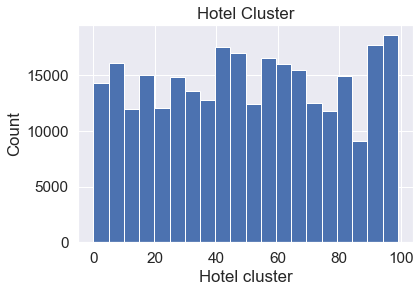

In [40]:
# Plot the count of hotel_cluster distribution
plt.hist(train['hotel_cluster'], bins = 20)
plt.title('Hotel Cluster')
plt.ylabel('Count')
plt.xlabel('Hotel cluster')

<AxesSubplot:title={'center':'Heatmap of Training Data'}>

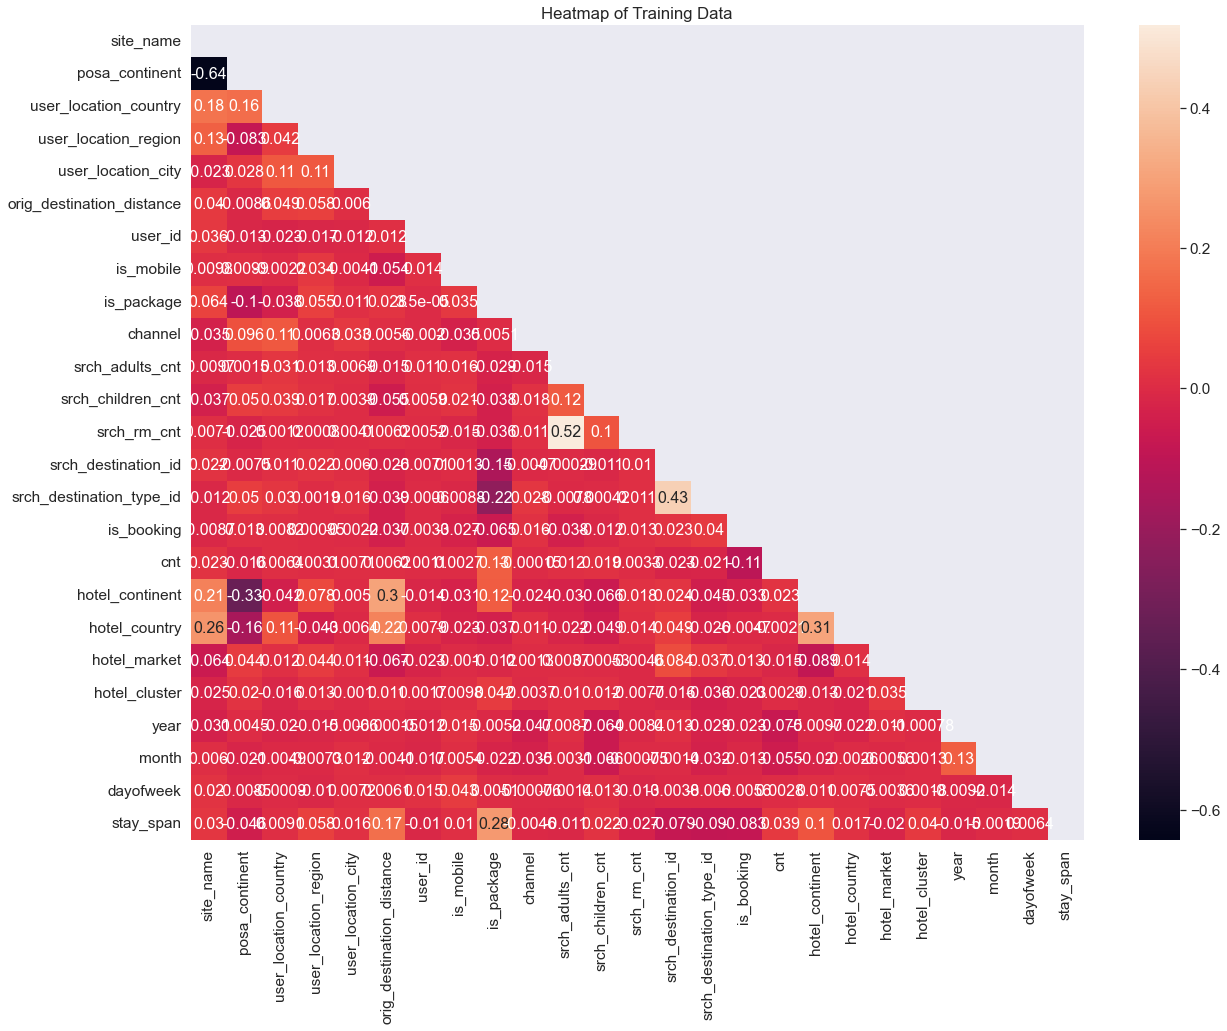

In [41]:
#create a correlation matrix to see relationship of training data
corr = train.corr()

matrix = np.triu(corr)
plt.subplots(figsize=(20,15))
sns.set(font_scale=1.4)
plt.title('Heatmap of Training Data')
sns.heatmap(corr, annot = True, mask = matrix, annot_kws = {"size": 16})

               count
hotel_cluster       
0                137
1                281
2                361
3                 82
4                242
...              ...
95               363
96               106
97               165
98               366
99               252

[100 rows x 1 columns]


Text(0.5, 0, 'Hotel cluster')

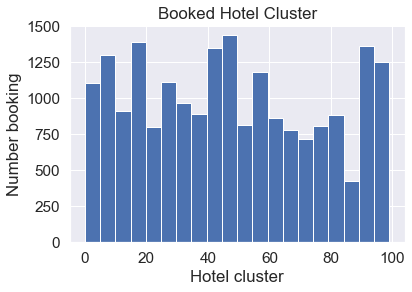

In [50]:
#drop data that does not book 'is_booking = 0'
train_book = train.drop(train[train['is_booking'] < 1].index)
# print(train_book)

#count each cluster is book
book_cluster = train_book.groupby(['hotel_cluster'])['is_booking'].agg(['count'])
print(book_cluster)

#histogram of count each cluster is book
plt.hist(train_book['hotel_cluster'], bins = 20)
plt.title('Booked Hotel Cluster')
plt.ylabel('Number booking')
plt.xlabel('Hotel cluster')

In [16]:
#grouped the data by the hotel location and count each columns
country_market = train.groupby(['hotel_continent', 'hotel_country']).agg(['count'])
print(country_market)

                              date_time site_name posa_continent  \
                                  count     count          count   
hotel_continent hotel_country                                      
0               34                  907       907            907   
                49                    1         1              1   
                63                 3033      3033           3033   
                87                  460       460            460   
                114                  13        13             13   
...                                 ...       ...            ...   
6               204                8323      8323           8323   
                206                 171       171            171   
                208                2252      2252           2252   
                211                  28        28             28   
                212                 135       135            135   

                              user_location_cou

In [17]:
#grouped the data and count the cluster
book_package_custer = train.groupby(['is_booking', 'is_package', 'hotel_cluster'])['hotel_cluster'].agg(['count'])
print(book_package_custer)

                                     count
is_booking is_package hotel_cluster       
0          0          0               1672
                      1               1685
                      2               2321
                      3               1303
                      4               2064
...                                    ...
1          1          95                61
                      96                35
                      97                36
                      98                81
                      99                43

[400 rows x 1 columns]


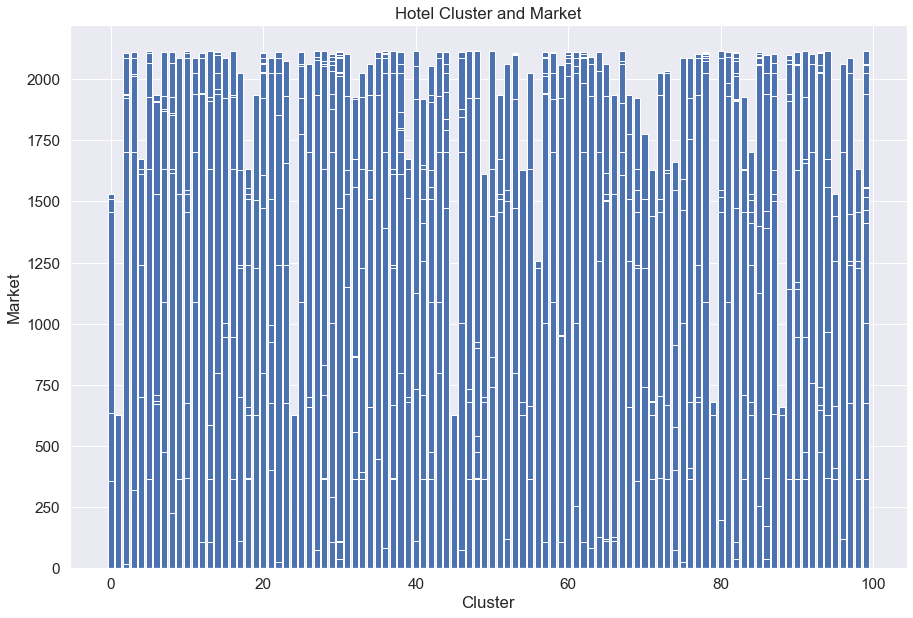

In [18]:
# Create bar chart
plt.bar(train['hotel_cluster'], train['hotel_market'])

fig = plt.gcf()
fig.set_size_inches(15, 10)

# Add axis labels and title
plt.xlabel('Cluster')
plt.ylabel('Market')
plt.title('Hotel Cluster VS Market')

# Show plot
plt.show()

            count
month year       
1     2013   5780
      2014   9089
2     2013   6259
      2014   8708
3     2013   7724
      2014  13081
4     2013   7031
      2014  13395
5     2013   7308
      2014  13963
6     2013   7553
      2014  17892
7     2013   8464
      2014  22166
8     2013   7310
      2014  21950
9     2013   7248
      2014  20831
10    2013   6679
      2014  20362
11    2013   6208
      2014  21348
12    2013   6693
      2014  23371


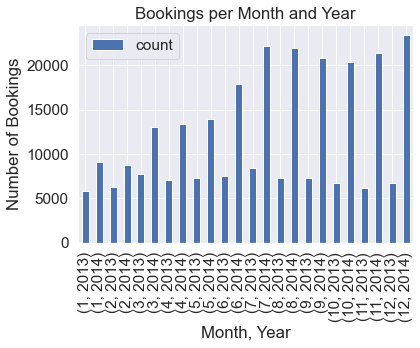

In [48]:
#Find the peak booking month
booking_month = train.groupby(['month','year'])['is_booking'].agg(['count'])
print(booking_month)

booking_month.plot(kind='bar', title='Bookings per Month and Year')
plt.xlabel('Month, Year')
plt.ylabel('Number of Bookings')
plt.show()


The peak booking month is July 

In [46]:
print(booking_month.max())
print(booking_month.min())


count    23371
dtype: int64
count    5780
dtype: int64


           count
dayofweek       
0          46642
1          45709
2          46091
3          41364
4          36939
5          33279
6          40389


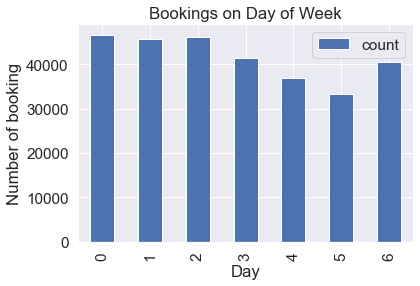

In [39]:
#Find the peak booking date of the week
booking_dayofweek = train.groupby(['dayofweek'])['is_booking'].agg(['count'])
print(booking_dayofweek)

booking_dayofweek.plot(kind='bar', title='Bookings on Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of booking')
plt.show()

The peak booking day of the week is Sunday (dayofweek = 0)

In [25]:
print(booking_dayofweek.max())

count    46642
dtype: int64


In [52]:
book = train.groupby(['is_booking'])['hotel_cluster'].agg(['count'])
print(book)

             count
is_booking        
0           270066
1            20347
